In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from astropy.io import fits
import pylab
from scipy import interpolate
import sys

%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
hdulist1 = fits.open('testQimage1.fits')
hdulistPSF = fits.open('psf_178.168914766_-0.501176508188.fits')

In [3]:
hdulist1.info()
hdulistPSF.info()
#hdulist.close()

Filename: testQimage1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (120, 120)   float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              
Filename: psf_178.168914766_-0.501176508188.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (43, 43)     float64   


In [4]:
im1 = hdulist1[1].data
psf = hdulistPSF[0].data
size1 = im1.shape
sizePsf = psf.shape

(0, 40)

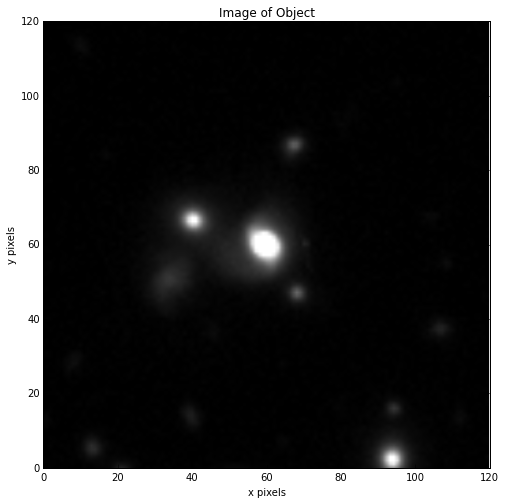

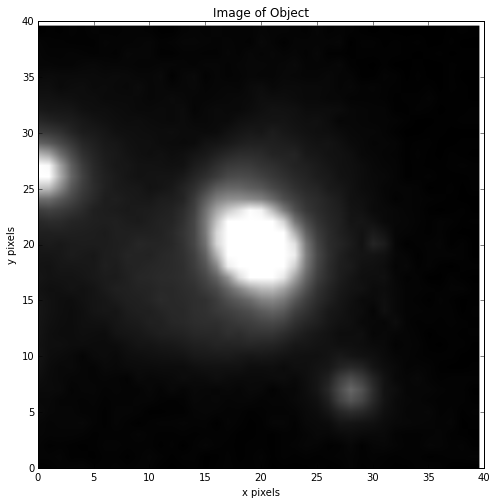

In [5]:
pylab.figure(figsize=(8,8))
#pylab.clf()
pylab.gray()
pylab.imshow(im1, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object")
pylab.ylim([0, size1[0]])
pylab.xlim([0, size1[1]])

smallerIm = im1[40:80, 40:80]
smallsize = smallerIm.shape



pylab.figure(figsize=(8,8))
pylab.imshow(smallerIm, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object")
pylab.ylim([0, smallsize[0]])
pylab.xlim([0, smallsize[1]])




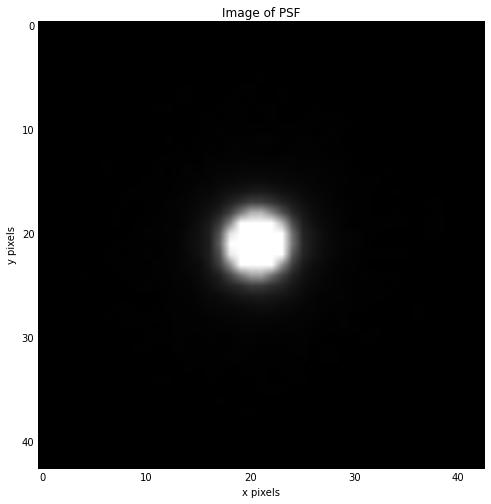

In [6]:
pylab.figure(figsize=(8,8))
#pylab.clf()

pylab.gray()
pylab.imshow(psf, vmin = 0, vmax = .01)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of PSF")



# graph zeropoint - 2.5log10(f_v / (0.168)^2) for surface brightness!


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in log10


(-0.01, 1.6800000000000002)

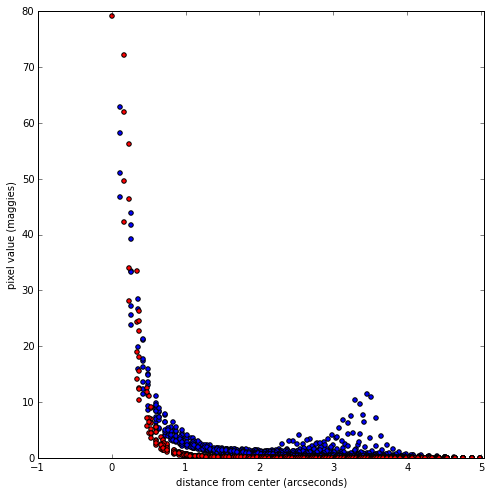

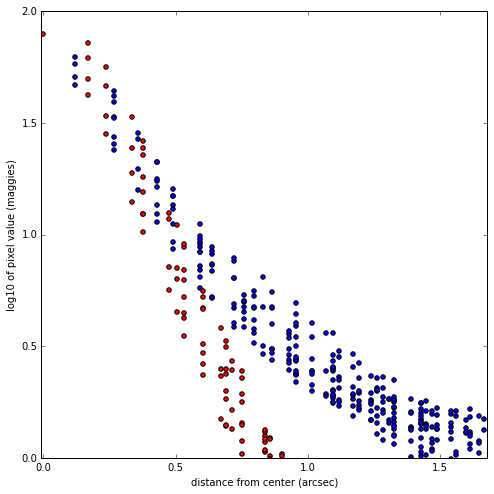

In [7]:
# calculate distance from center to any pixel
nx, ny = smallerIm.shape
x = np.arange(nx) - (nx-1)/2. 
y = np.arange(ny) - (ny-1)/2.
X, Y = np.meshgrid(x, y)
d = np.sqrt(X**2 + Y**2)


nxp, nyp = psf.shape
xp = np.arange(nxp) - (nxp-1)/2. 
yp = np.arange(nyp) - (nyp-1)/2.
Xp, Yp = np.meshgrid(xp, yp)
d_psf = np.sqrt(Xp**2 + Yp**2)



#f2 = interp1d(d_psf, psf, kind='cubic')



    

pylab.figure(figsize=(8,8))
plt.scatter(d * .168, smallerIm)    # changed to scatter from plot
plt.scatter(d_psf * .168, psf * 1e3, c = 'red')
pylab.xlabel('distance from center (arcseconds)')
pylab.ylabel('pixel value (maggies)')
pylab.ylim([0, 80])
pylab.xlim([-1, 30 * .168]) # 30 pixels

#print psf
#print smallerIm

pylab.figure(figsize=(8,8))
plt.scatter(d * .168, np.log10(smallerIm))    # changed to scatter from plot
plt.scatter(d_psf * .168, np.log10(psf * 1e3), c = 'red')
pylab.xlabel('distance from center (arcsec)')
pylab.ylabel('log10 of pixel value (maggies)')
pylab.ylim([0, 2])
pylab.xlim([-.01, 10 * .168]) # 10 pixels

#print smallerIm
#print d



# take average of each pixel distance
# spline
# don't average object data, only psf





# convolve -> I = integral I(x',y') * PSF (x - x', y - y')dx'dy' / integral(PSF dxdy)

# 1D convolve I(r) = integral (Model(r') * PSF(abs(r - r')) dr')



# do below without convolving first
# chi^2 = sum over pixels of (A*PSF + B*(galaxymodel convolved with PSF) - data)^2 ---- > no smoothing
# value at pixel and per pixel
# partial Chi A = 0
# partial chi B = 0
# loop over n and R_e for sersic
# minmize chi



# sersic - gamma function from integrating 0 to infinity I(R) * 2 *pi*r dr , sub x = R/R_e
# I_e R_e^2 * integral from 0 to x' of exp(-b_n(x^1/n -1))x*dx = Z_n(x')
# what is b_n such that Z(x'=1) / Z(x' = infinity) = 1/2 (half light)

# 1/2 of ^ THAT INTEGRAL = integral from 0 to r_E of I_E * 2 * pi* r *dr
# answer of the form I_e r_e^2 * gamma function(r)

In [8]:
re_val = np.linspace(0, 20, 40) # THIS IS IN PIXELS. 2.1 arcseconds out from center

n_val = [0.500000, 0.511646, 0.523564, 0.535760, 0.548239, 0.561009, 0.574077, 0.587449, 0.601132, 0.615134, 
        0.629463, 0.644125, 0.659128, 0.674481, 0.690192, 0.706269, 0.722720, 0.739554, 0.756781, 0.774408, 0.792447,
        0.810905, 0.829793, 0.849122, 0.868900, 0.889140, 0.909850, 0.931044, 0.952730, 0.974922, 0.997631, 1.02087, 
        1.04465, 1.06898, 1.09388, 1.11936, 1.14543, 1.17211, 1.19942, 1.22735, 1.25594, 1.28520, 1.31513, 1.34577,
        1.37711, 1.40919, 1.44202, 1.47560, 1.50998, 1.54515, 1.58114, 1.61797, 1.65566, 1.69422, 1.73368, 
        1.77407, 1.81539, 1.85768, 1.90095, 1.94523, 1.99054, 2.03690, 2.08435, 2.13290, 2.18258, 2.23342, 2.28544, 
        2.33868, 2.39315, 2.44889, 2.50594, 2.56431, 2.62404, 2.68516, 2.74770, 2.81171, 2.87720, 2.94422, 3.01280,
        3.08297, 3.15479, 3.22827, 3.30347, 3.38041, 3.45915, 3.53973, 3.62218, 3.70655, 3.79289, 3.88124,
        3.97164, 4.06415]

b_n_val = [0.693147,  0.715714, 0.738844, 0.762549, 0.786841, 0.811733, 0.837242, 0.863377, 0.890152, 0.917581, 
          0.945678, 0.97428497, 1.00414, 1.03425, 1.06512, 1.09675, 1.12917, 1.16237, 1.19659, 1.23123, 1.26689,
          1.3031702, 1.34075, 1.37902, 1.41820, 1.45832, 1.49938, 1.54143, 1.58446, 1.62852, 1.67362, 1.71979, 
          1.76705, 1.81544, 1.86496, 1.91565, 1.96754, 2.02064, 2.07499, 2.1305065, 2.18777, 2.24595, 2.30554, 2.36656, 
          2.4288661, 2.49298, 2.5581791, 2.62540, 2.69396, 2.76411, 2.83590, 2.90938, 2.98457, 3.06153, 3.14028, 
          3.22088, 3.30337, 3.38779, 3.47419, 3.56261, 3.65330, 3.74587, 3.84060, 3.93754, 4.03676, 4.13830, 4.24222, 
          4.34858, 4.45718, 4.5686032, 4.68289, 4.79944, 4.9186685, 5.04102, 5.16591, 5.29381, 5.42469, 5.55860, 5.69563,
          5.83585, 5.97934, 6.1266911, 6.2769893, 6.4308184, 6.58776, 6.74889, 6.91379, 7.08253, 7.25517, 7.4316895, 
          7.61277, 7.79751]




def sersic(n, b_n, re, r): # no bn constant right now
    return np.e**(b_n*(r / re)**(1/n) -1)



In [9]:
# sum (data * psf) = A * sum(psf^2) + B sum(psf * galaxy)
# CHI SQUARED Fitting for galaxy and psf model data

def chiMinCalc(re):
    data = smallerIm
    tot = 0
    chiMin = sys.maxint
    AMin = 0.
    BMin = 0.
    b_nMin = 0.
    nMin = 0.
        
    
    for k in range(92):

        sum1 = 0.
        sum1A = 0.
        sum1B = 0.
        dist = 0.

        sum2 = 0.
        sum2A = 0.
        sum2B = 0.
        n = n_val[k]
        b_n = b_n_val[k]
    
        #print "For a n, b_n of: ", n, b_n 


        for i in range(1, 40):   # start from 1 to avoid accessing -1 for data, end at 40 cause data ends at 40
            for j in range(1, 40):
                r = np.sqrt((i-1 - 20)**2 + (j-1 - 20)**2) # data centered at 20 20
                sum1 += data[i-1][j-1] * psf[i][j]
                sum1A += psf[i][j] * psf[i][j]
                sum1B += psf[i][j] * sersic(n, b_n, re, r)
            
                sum2 += data[i-1][j-1] * sersic(n, b_n, re, r)
                sum2A += psf[i][j] * sersic(n, b_n, re, r)
                sum2B += (sersic(n, b_n, re, r))**2
            
    
            
        #print "Derivative of A: ", sum1, sum1A, sum1B
        #print "Derivative of B: ", sum2, sum2A, sum2B

        # solve for A and B
        a = ([[sum1A, sum1B],[sum2A, sum2B]])
        b = ([sum1, sum2])
    
        A, B = np.linalg.solve(a, b)
        #print "A, B coefficients are: ", A, B
    
    
        chi2 = 0.
    
        # chi2 calculation for min
        for i in range (1, 40):
            for j in range(1, 40):
                r = np.sqrt((i-1 - 20)**2 + (j-1 - 20)**2) # data centered at 20 20
                chi2 += (A * psf[i][j] + B * sersic(n, b_n, re, r) - data[i-1][j-1])**2
    
        if chi2 < chiMin:
            chiMin = chi2    # values that minimize chi2
            AMin = A
            BMin = B
            b_nMin = b_n
            nMin = n
        
        
        
        
            
        #print "Chi^2 is: ", chi2
    
    
    
    print "The MINIMUM Chi2 is: ", chiMin, " for A, B = ", AMin, BMin, " b_n = ", b_nMin, " n = ", nMin


        


In [10]:
for i in range(30, 40):
    print i, " - RE of ", re_val[i]
    chiMinCalc(re_val[i])

30  - RE of  15.3846153846
The MINIMUM Chi2 is:  3160.67939036  for A, B =  912.611769498 0.562805853734  b_n =  0.693147  n =  0.5
31  - RE of  15.8974358974
The MINIMUM Chi2 is:  3126.71565742  for A, B =  911.849070824 0.630638978133  b_n =  0.693147  n =  0.5
32  - RE of  16.4102564103
The MINIMUM Chi2 is:  3094.83732059  for A, B =  911.101432988 0.697326081924  b_n =  0.693147  n =  0.5
33  - RE of  16.9230769231
The MINIMUM Chi2 is:  3065.00992415  for A, B =  910.37398282 0.762383343882  b_n =  0.693147  n =  0.5
34  - RE of  17.4358974359


KeyboardInterrupt: 

[ 2.21111419  2.20967842  2.20537669  2.19822575  2.18825336  2.17549817
  2.16000941  2.14184663  2.12107927  2.09778625  2.07205544  2.04398316
  2.01367352  1.98123782  1.94679384  1.91046515  1.87238038  1.83267244
  1.79147775  1.74893549  1.70518683  1.6603741   1.61464011  1.56812734
  1.52097726  1.47332961  1.42532177  1.3770881   1.32875935  1.28046216
  1.23231849  1.18444524  1.13695379  1.08994967  1.04353225  0.99779452
  0.95282283  0.90869681  0.8654892   0.82326586  0.78208573  0.74200088
  0.7030566   0.66529147  0.6287376   0.59342072  0.55936049  0.52657068
  0.49505946  0.46482969]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


(-0.01, 15)

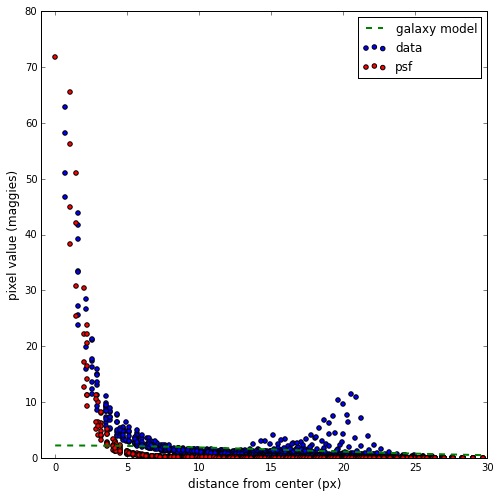

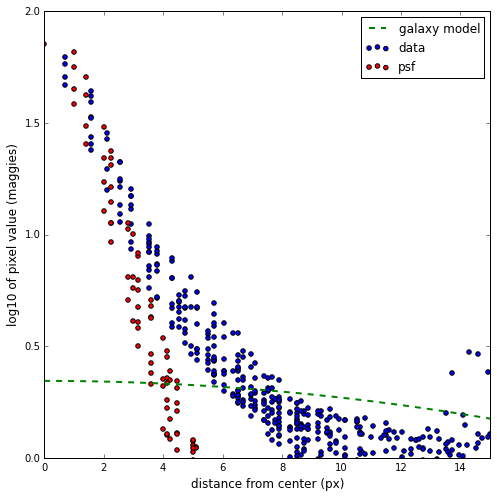

In [11]:
# Max pixel = 20 due to weighting from other objects in the photo?
# are they affecting the graph too much?


A = 906.563628163
B =  1.10555729609
b_n = 0.693147 
n = 0.5
re = 20.0
r = np.linspace(0, 30, 50)
galaxy = B * np.e**(- b_n * ((r / re)**(1 / n) - 1))

print galaxy



pylab.figure(figsize=(8,8))
plt.scatter(d, smallerIm, label='data')    # changed to scatter from plot
plt.scatter(d_psf, psf *  A, c = 'red', label='psf')
plt.plot(r, galaxy, 'g--', linewidth=2.0, label='galaxy model')
plt.legend()
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (maggies)', size = 12)
pylab.ylim([0, 80])
pylab.xlim([-1, 30]) # 30 pixels

#print psf
#print smallerIm

pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(smallerIm), label = 'data')    # changed to scatter from plot
plt.scatter(d_psf, np.log10(psf *  A), c = 'red', label = 'psf')
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label = 'galaxy model')
plt.legend()
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)
pylab.ylim([0, 2])
pylab.xlim([-.01, 15]) # 10 pixels

#print smallerIm
#print d

27.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


(0, 10)

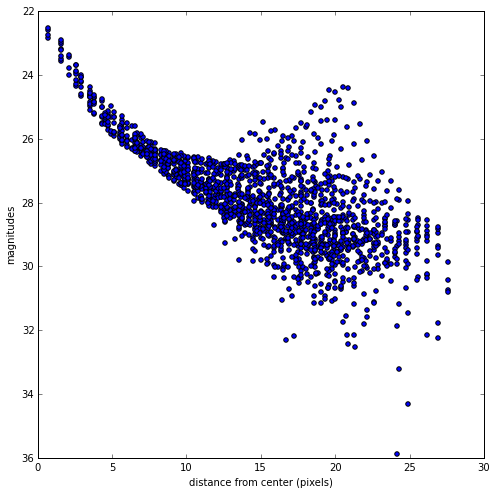

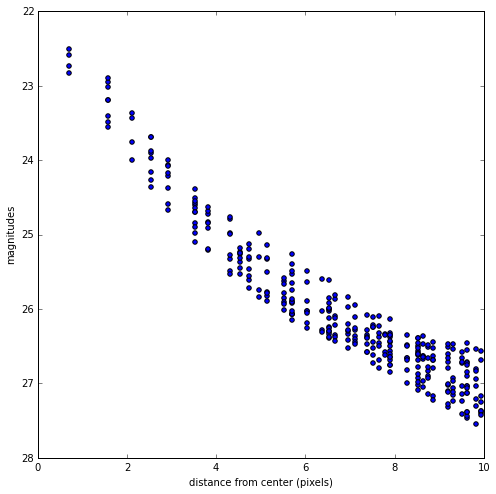

In [12]:
# convert from maggies to magnitudes
# 27.0 is average for HSC- find exact value for this image

# zero point calculation:
fluxmag0 = 63095734448.0194                   # given in header
zeropoint = 2.5*np.log10(fluxmag0)
print zeropoint


# magnitude calculation:
mags = zeropoint - 2.5*np.log10(smallerIm) 
#print mags


pylab.figure(figsize=(8,8))
plt.scatter(d, mags)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('magnitudes')
pylab.ylim([36, 22])
pylab.xlim([0, 30]) # 30 pixels


pylab.figure(figsize=(8,8))
plt.scatter(d, mags)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('magnitudes')
pylab.ylim([28, 22])
pylab.xlim([0, 10]) # 10 pixels


# .168 arcsec
# convert to flux, multiply by ^2, and then convert back to sq

27.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


(0, 10)

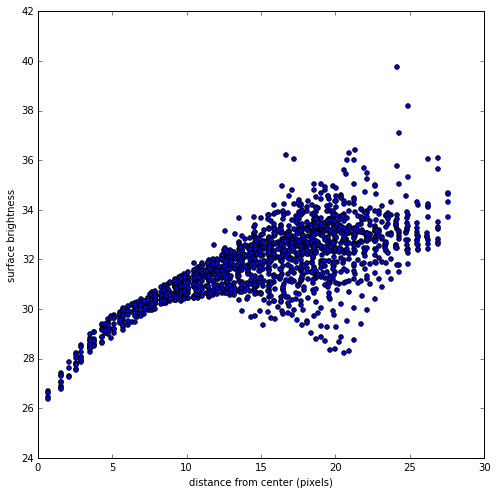

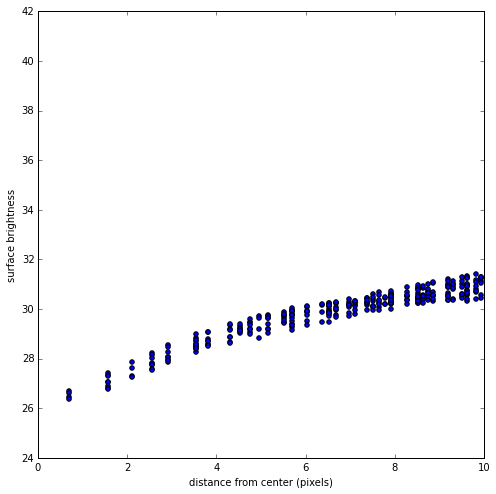

In [13]:
# convert from maggies to magnitudes
# 27.0 is average for HSC- find exact value for this image

# zero point calculation:
fluxmag0 = 63095734448.0194                   # given in header
zeropoint = 2.5*np.log10(fluxmag0)
print zeropoint


# magnitude calculation:
mags = zeropoint - 2.5*np.log10(smallerIm)   
#print mags

flux_perPixel = 10**(-2./5. * mags) * (3631. * 1E-23)
flux = flux_perPixel * (.168**2) # multiply - or divide- by area of each pixel?
# convert back to magnitudes

#surface_mag = -5./2 np.log10(3631. * 1E-23 / (flux))
surface_mag = -5./2 * np.log10(flux / (3631. * 1E-23 ))
pylab.figure(figsize=(8,8))
plt.scatter(d, surface_mag)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('surface brightness')
#pylab.ylim([17.5, 11])
pylab.xlim([0, 30]) # 30 pixels


pylab.figure(figsize=(8,8))
plt.scatter(d, surface_mag)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('surface brightness')
#pylab.ylim([14, 11])
pylab.xlim([0, 10]) # 10 pixels


# .168 arcsec
# convert to flux, multiply by ^2, and then convert back to sq

[[  4.18632506e-32   6.59914476e-32   9.98422584e-32 ...,   4.97616440e-33
    7.10733198e-33   1.81952243e-32]
 [  9.60824750e-32   9.00680757e-32   1.14567171e-31 ...,   7.50423133e-32
    7.53954553e-32   1.08115258e-31]
 [  1.16077975e-31   5.22462218e-32   7.39869310e-32 ...,   7.75946231e-32
    9.80120960e-32   2.80480563e-32]
 ..., 
 [  1.38370884e-31   1.02009447e-31   9.79716413e-32 ...,   1.94787628e-32
    2.42801385e-32   2.92610930e-32]
 [  1.14928506e-31   8.41920616e-32   8.35412198e-32 ...,   6.26697827e-32
               nan   4.63415836e-33]
 [  1.74455631e-32   6.19080565e-32   2.60273639e-32 ...,   4.24313259e-32
    5.13271674e-32   2.44107947e-32]]


(0, 10)

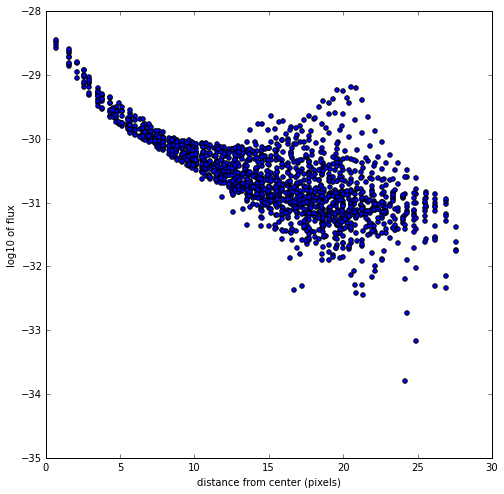

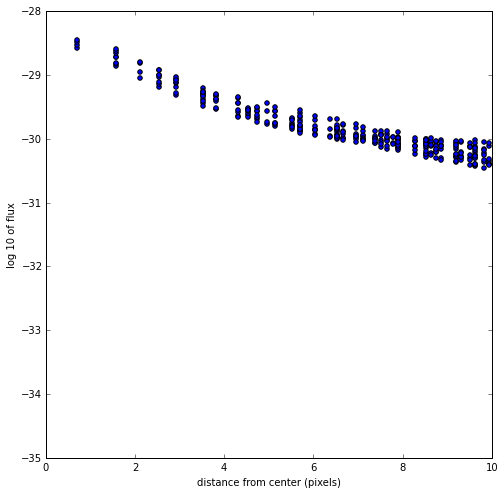

In [12]:
# mag = -5./2. * np.log10(flux / (3631. * 1E-23))
flux = 10**(-2./5. * mags) * (3631. * 1E-23)


print flux

pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(flux))    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('log10 of flux')
#pylab.ylim([-34, -28])
pylab.xlim([0, 30])


pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(flux))    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('log 10 of flux')
#pylab.ylim([-31, -28])
pylab.xlim([0, 10])


In [7]:
# plot y axis log
# normalization of psf doesn't matter - can change
# plot psf over above graph